<h1 align="center">Volume 1: Facial Recognition.</h1>

    Everett Bergeson

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from numpy import linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))
        

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    plt.imshow(np.reshape(image, (m, n)), cmap="gray")
    plt.axis("off")
    plt.show()

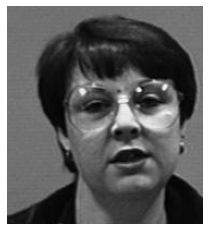

The 0th face from the database


In [4]:
faces = get_faces()
face = faces[:,0]
show(face)
print("The 0th face from the database")

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces()
        self.mu = np.mean(self.F, axis=1)
        self.Fbar = (self.F.T - self.mu).T
        
        # initialize U attribute
        u, s, vh = la.svd(self.Fbar, full_matrices=False)
        self.U = u

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        # Get the first s columns of U
        return self.U[:,:s].T @ A
        

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        F_hat = self.project(self.F, s)
        g_hat = self.project(g, s)
        
        # Calculate the norm of the difference between F_hat_i and g_hat
        normed = []
        for i in range(153):
            normed.append(la.norm(F_hat[:,i] - g_hat))
            
        # return the index of the lowest norm
        return np.argmin(normed)
        

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        # Get the index of the best match
        best_match = self.find_nearest(image, s)
        
        # Display the original
        ax1 = plt.subplot(121)
        ax1.imshow(np.reshape(image, (200, 180)), cmap="gray")
        ax1.axis("off")
        ax1.set_title("Original")
        
        # Display the best match
        ax2 = plt.subplot(122)
        ax2.imshow(np.reshape(self.F[:,best_match], (200, 180)), cmap="gray")
        ax2.axis("off")
        ax2.set_title("Best Match")
        
        plt.show()

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

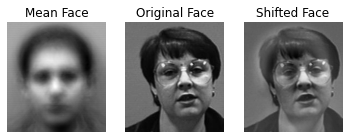

In [6]:
test = FacialRec()

# Display mean face, original face, shifted face
ax1 = plt.subplot(131)
ax1.imshow(np.reshape(test.mu, (200, 180)), cmap="gray")
ax1.set_title("Mean Face")
ax1.axis("off")

ax2 = plt.subplot(132)
ax2.imshow(np.reshape(test.F[:,0], (200, 180)), cmap="gray")
ax2.set_title("Original Face")
ax2.axis("off")

ax3 = plt.subplot(133)
ax3.imshow(np.reshape(test.Fbar[:,0], (200, 180)), cmap="gray")
ax3.set_title("Shifted Face")
ax3.axis("off")

plt.show()

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


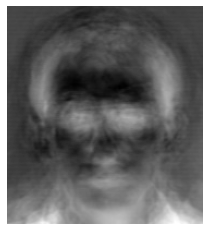

0th eigenface


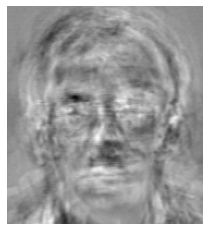

49th eigenface


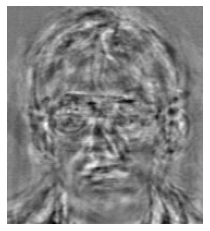

99th eigenface


In [7]:
show(test.U[:,0])

# Display the 0, 49, 99 eigenfaces

print("0th eigenface")
show(test.U[:,49])
print("49th eigenface")
show(test.U[:,99])
print("99th eigenface")

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

S = 5


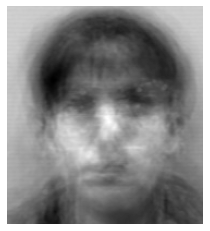

S = 19


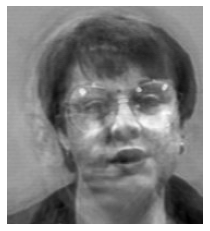

S = 75


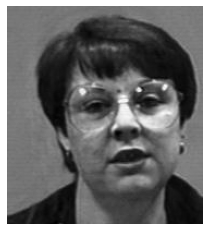

In [8]:
face = FacialRec()

# Try s = 5
# Get projection of 0th picture onto U5
f_hat_5 = face.project(face.Fbar[:,0], 5)
# f_squiggle = Us @ f_hat + mu
f_squiggle_5 = face.U[:,:5] @ f_hat_5 + face.mu
print("S = 5")
show(f_squiggle_5)

# s = 19
f_hat_19 = face.project(face.Fbar[:,0], 19)
f_squiggle_19 = face.U[:,:19] @ f_hat_19 + face.mu
print("S = 19")
show(f_squiggle_19)

# s = 75
f_hat_75 = face.project(face.Fbar[:,0], 75)
f_squiggle_75 = face.U[:,:75] @ f_hat_75 + face.mu
print("S = 75")
show(f_squiggle_75)

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

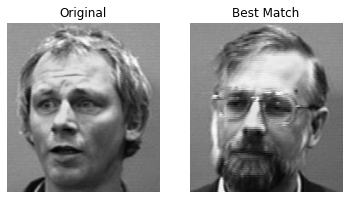

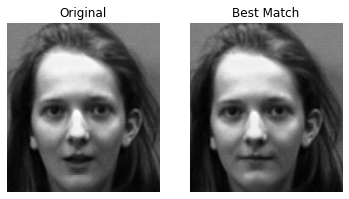

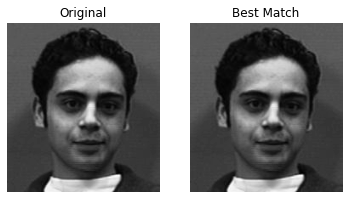

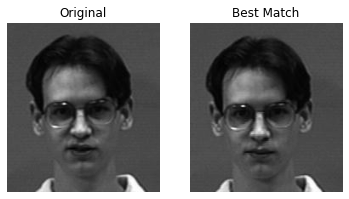

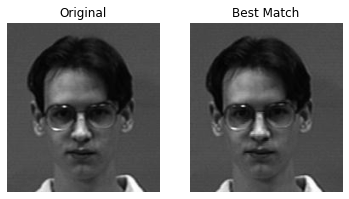

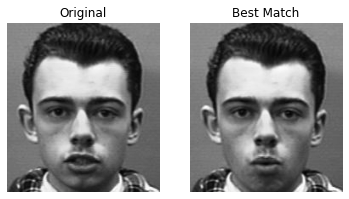

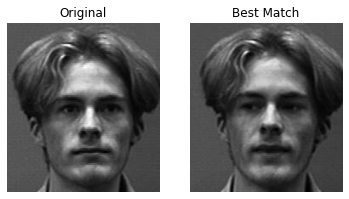

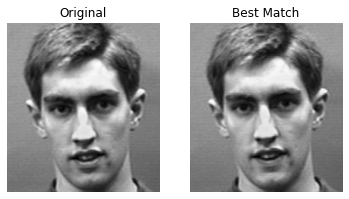

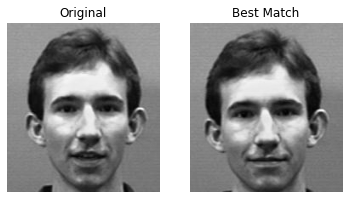

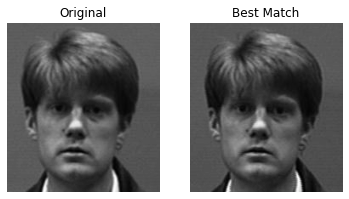

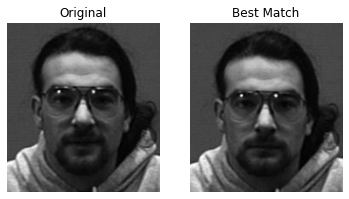

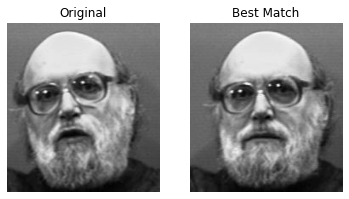

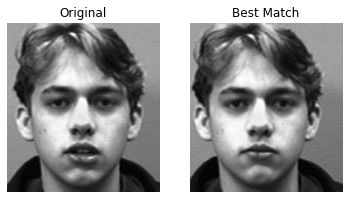

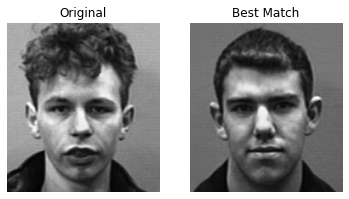

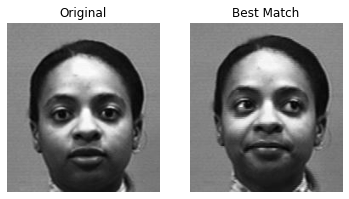

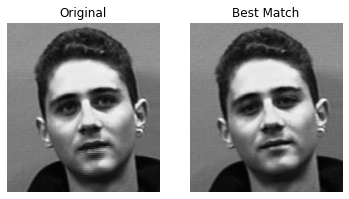

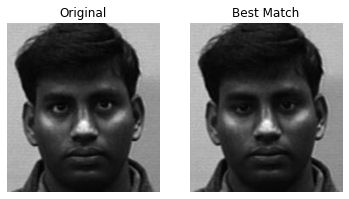

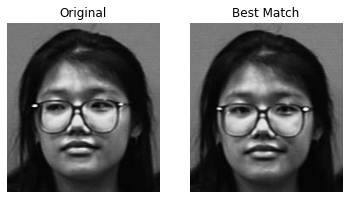

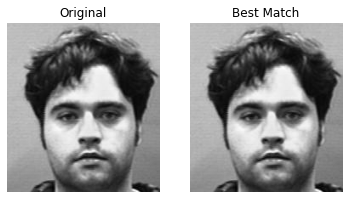

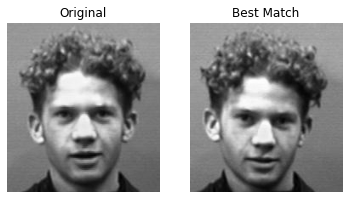

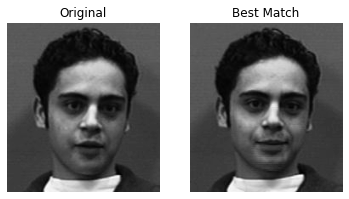

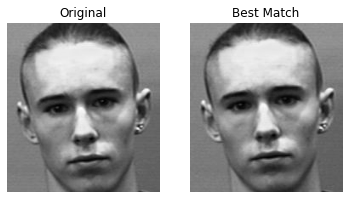

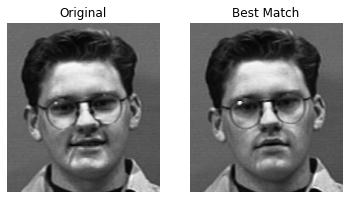

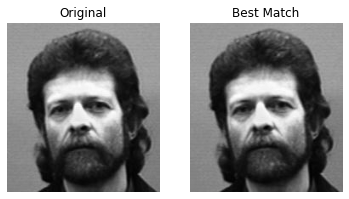

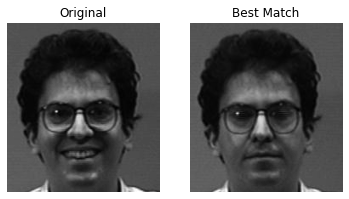

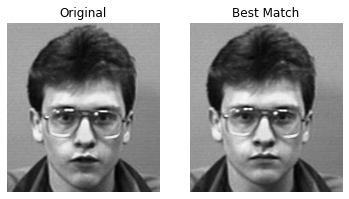

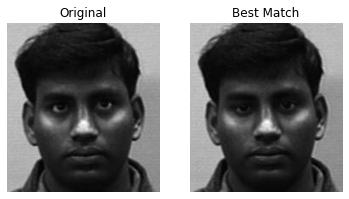

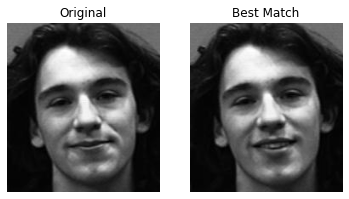

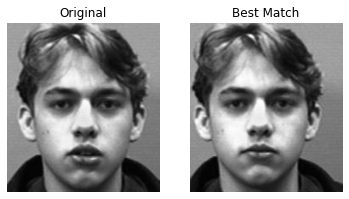

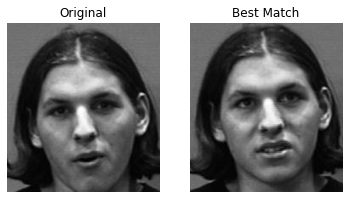

In [10]:
database = FacialRec()
for test_image in sample_faces(30):
    database.match(test_image)